**Forecasting Copper Prices**
=============================

In [1]:
! pip install OleFileIO_PL

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.0/120.0 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Discarding https://files.pythonhosted.org/packages/a0/05/f124ecb536ae2090891d3bcb6a65facd1358f4fd10422c1354357687e8dc/OleFileIO_PL-0.42.1.zip (from https://pypi.org/simple/olefileio-pl/): Requested olefile from https://files.pythonhosted.org/packages/a0/05/f124ecb536ae2090891d3bcb6a65facd1358f4fd10422c1354357687e8dc/OleFileIO_PL-0.42.1.zip has inconsistent name: expected 'olefileio-pl', but metadata has 'olefile'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.4/118.4 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Discarding https://files.pythonhosted.org/packages/1a/5b/3c6803bb51336b71525bce4c811c598107073dc642c9fafffc6a79b0e4b7/OleFileIO_PL-0.41.zip (from https://pypi.org/simple/olefileio-pl/): Requested olefile from https://files.pythonhosted.org/packages/1a/5b/3c6803bb51336b71525bce4c811c598107073dc642c9fafffc6a79b0e4b7/OleFileIO_PL-0.41.zip

## **Importing Packages**

In [2]:
import numpy as np
import pandas as pd
import os
import datetime
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import requests
import IPython.display
import OleFileIO_PL
import re

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

## **Loading Datasets**

### Copper Prices

In [3]:
df_copper_1 = pd.read_csv("/content/Copper Futures Historical Data (2000-2019).csv")
df_copper_1.head(10)

,Date,Price,Open,High,Low,Vol.,Change %
0,10/28/2019,2.6830,2.6850,2.6890,2.6735,49.12K,0.28%
1,10/25/2019,2.6755,2.6665,2.6905,2.6590,57.34K,0.28%
2,10/24/2019,2.6680,2.6690,2.6795,2.6590,61.06K,-0.13%
3,10/23/2019,2.6715,2.6355,2.6745,2.6145,75.68K,1.46%
4,10/22/2019,2.6330,2.6450,2.6505,2.6295,46.14K,-0.51%
5,10/21/2019,2.6465,2.6395,2.6600,2.6305,54.49K,0.40%
6,10/18/2019,2.6360,2.6000,2.6460,2.5850,71.81K,1.48%
7,10/17/2019,2.5975,2.5870,2.6175,2.5770,53.90K,0.31%
8,10/16/2019,2.5895,2.6125,2.6130,2.5730,54.26K,-0.94%
9,10/15/2019,2.6140,2.6320,2.6415,2.6060,53.71K,-0.76%


In [4]:
df_copper_1.shape

(5000, 7)

In [5]:
df_copper_2 = pd.read_csv("/content/Copper Futures Historical Data (2019-2023).csv")
df_copper_2.head(10)

,Date,Price,Open,High,Low,Vol.,Change %
0,10/20/2023,3.5630,3.5850,3.5900,3.5465,NaN,-1.06%
1,10/19/2023,3.6010,3.5840,3.6120,3.5665,66.12K,0.39%
2,10/18/2023,3.5870,3.5900,3.6305,3.5750,69.58K,0.24%
3,10/17/2023,3.5785,3.5815,3.5930,3.5315,86.04K,-0.10%
4,10/16/2023,3.5820,3.5705,3.6055,3.5635,57.58K,0.31%
5,10/13/2023,3.5710,3.5870,3.6165,3.5570,64.95K,-0.56%
6,10/12/2023,3.5910,3.6115,3.6485,3.5695,69.71K,-0.58%
7,10/11/2023,3.6120,3.6310,3.6640,3.5985,52.51K,-0.61%
8,10/10/2023,3.6340,3.6560,3.6745,3.5910,57.84K,-0.33%
9,10/09/2023,3.6460,3.6275,3.6730,3.6135,64.06K,0.51%


In [6]:
df_copper_1['Date'] = pd.to_datetime(df_copper_1['Date'])
df_copper_2['Date'] = pd.to_datetime(df_copper_2['Date'])

In [7]:
df_copper_1.sort_values(by='Date')
df_copper_2.sort_values(by='Date')

,Date,Price,Open,High,Low,Vol.,Change %
1055,2019-10-28,2.6830,2.6850,2.6890,2.6735,49.12K,0.28%
1054,2019-10-29,2.6915,2.6820,2.6970,2.6725,52.04K,0.32%
1053,2019-10-30,2.6905,2.6860,2.6935,2.6675,0.11K,-0.04%
1052,2019-10-31,2.6425,2.6865,2.6890,2.6350,0.32K,-1.78%
1051,2019-11-01,2.6575,2.6505,2.6680,2.6420,0.41K,0.57%
...,...,...,...,...,...,...,...
4,2023-10-16,3.5820,3.5705,3.6055,3.5635,57.58K,0.31%
3,2023-10-17,3.5785,3.5815,3.5930,3.5315,86.04K,-0.10%
2,2023-10-18,3.5870,3.5900,3.6305,3.5750,69.58K,0.24%
1,2023-10-19,3.6010,3.5840,3.6120,3.5665,66.12K,0.39%


In [8]:
# all_copper_history = pd.DataFrame(columns=df_copper_1.columns)
all_copper_history = pd.concat([df_copper_2, df_copper_1], ignore_index=True)
all_copper_history = all_copper_history.sort_values(by='Date')
all_copper_history

,Date,Price,Open,High,Low,Vol.,Change %
6055,2000-01-04,0.8480,0.8615,0.8620,0.8450,12.25K,-1.74%
6054,2000-01-05,0.8565,0.8450,0.8590,0.8380,9.24K,1.00%
6053,2000-01-06,0.8530,0.8560,0.8565,0.8480,6.94K,-0.41%
6052,2000-01-07,0.8540,0.8530,0.8625,0.8495,6.23K,0.12%
6051,2000-01-10,0.8465,0.8530,0.8545,0.8400,7.13K,-0.88%
...,...,...,...,...,...,...,...
4,2023-10-16,3.5820,3.5705,3.6055,3.5635,57.58K,0.31%
3,2023-10-17,3.5785,3.5815,3.5930,3.5315,86.04K,-0.10%
2,2023-10-18,3.5870,3.5900,3.6305,3.5750,69.58K,0.24%
1,2023-10-19,3.6010,3.5840,3.6120,3.5665,66.12K,0.39%


In [9]:
rows_with_missing = all_copper_history[all_copper_history.isna().any(axis=1)]
rows_with_missing

,Date,Price,Open,High,Low,Vol.,Change %
5632,2001-09-11,0.6540,0.6530,0.6550,0.6530,NaN,0.08%
5382,2002-09-16,0.6860,0.6860,0.6860,0.6860,NaN,-1.58%
5380,2002-09-18,0.6750,0.6750,0.6750,0.6750,NaN,-1.53%
5324,2002-12-09,0.7355,0.7355,0.7355,0.7355,NaN,-1.41%
5202,2003-06-05,0.7840,0.7840,0.7840,0.7840,NaN,0.26%
...,...,...,...,...,...,...,...
66,2023-07-21,3.8180,3.8280,3.8740,3.8090,NaN,-0.43%
65,2023-07-24,3.8555,3.8185,3.8605,3.7820,NaN,0.98%
35,2023-09-03,3.8550,3.8505,3.8567,3.8475,NaN,0.08%
34,2023-09-04,3.8320,3.8540,3.8725,3.8163,NaN,-0.60%


In [10]:
# Removing Unnecessary Columns
all_copper_history = all_copper_history.drop(columns=['Vol.', 'Change %', 'Open', 'High', 'Low'])

In [11]:
# Resetting Index
all_copper_history.set_index('Date', inplace=True)
all_copper_history = all_copper_history.reset_index(drop=False)
all_copper_history

,Date,Price
0,2000-01-04,0.8480
1,2000-01-05,0.8565
2,2000-01-06,0.8530
3,2000-01-07,0.8540
4,2000-01-10,0.8465
...,...,...
6051,2023-10-16,3.5820
6052,2023-10-17,3.5785
6053,2023-10-18,3.5870
6054,2023-10-19,3.6010


In [12]:
# Removing Duplicated Rows
all_copper_history.drop_duplicates()
all_copper_history

,Date,Price
0,2000-01-04,0.8480
1,2000-01-05,0.8565
2,2000-01-06,0.8530
3,2000-01-07,0.8540
4,2000-01-10,0.8465
...,...,...
6051,2023-10-16,3.5820
6052,2023-10-17,3.5785
6053,2023-10-18,3.5870
6054,2023-10-19,3.6010


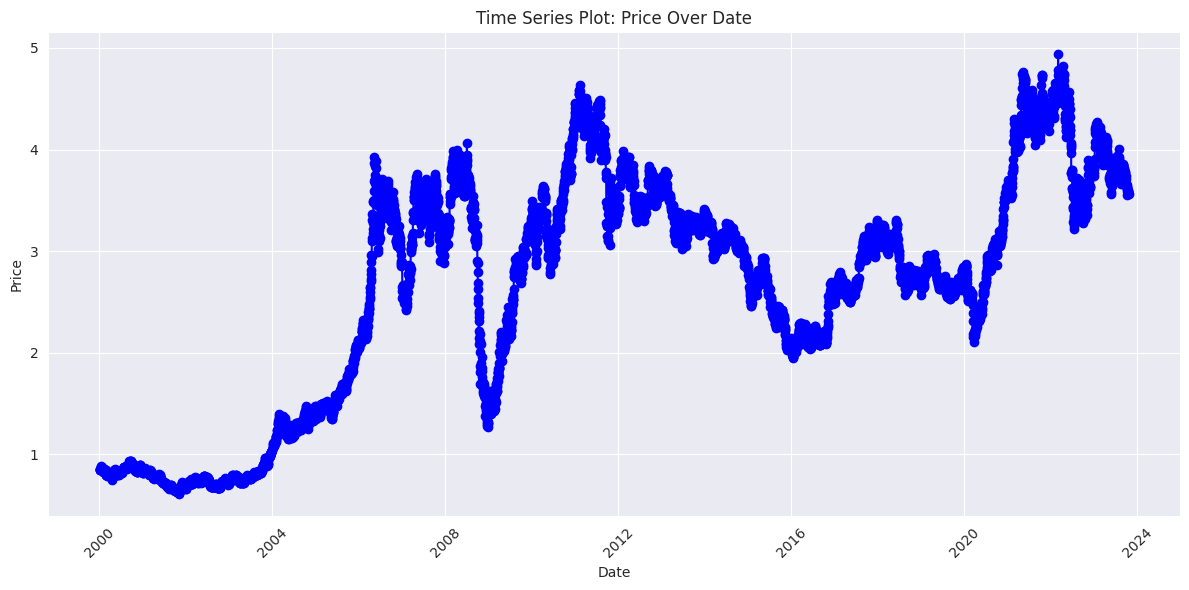

In [13]:
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(all_copper_history['Date'], all_copper_history['Price'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Time Series Plot: Price Over Date')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.show()

In [14]:
# Eliminating Outliers
lower_bound = 0.1
for index, row in all_copper_history.iterrows():
    if row['Price'] < lower_bound:
        # Calculate the mean of the previous 7 days' prices
        start_date = row['Date'] - pd.DateOffset(days=8)
        end_date = row['Date'] - pd.DateOffset(days=1)
        previous_7_days_mean = all_copper_history[(all_copper_history['Date'] >= start_date) & (all_copper_history['Date'] <= end_date)]['Price'].mean()

        # Replace 'updated_price' with the calculated mean
        all_copper_history.at[index, 'Price'] = previous_7_days_mean
all_copper_history.sort_values(by="Date")

,Date,Price
0,2000-01-04,0.8480
1,2000-01-05,0.8565
2,2000-01-06,0.8530
3,2000-01-07,0.8540
4,2000-01-10,0.8465
...,...,...
6051,2023-10-16,3.5820
6052,2023-10-17,3.5785
6053,2023-10-18,3.5870
6054,2023-10-19,3.6010


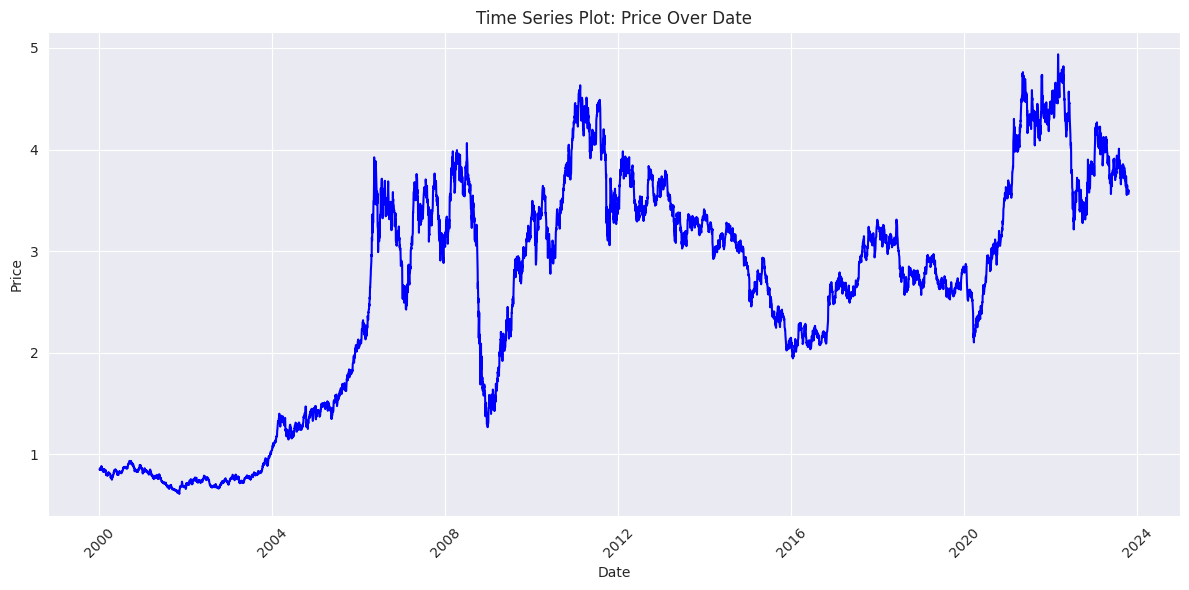

In [15]:
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(all_copper_history['Date'], all_copper_history['Price'], linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Time Series Plot: Price Over Date')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.show()

In [16]:
# Extract day, month, and year into separate columns
all_copper_history['Day'] = all_copper_history['Date'].dt.day
all_copper_history['Month'] = all_copper_history['Date'].dt.month
all_copper_history['Year'] = all_copper_history['Date'].dt.year

In [17]:
all_copper_history

,Date,Price,Day,Month,Year
0,2000-01-04,0.8480,4,1,2000
1,2000-01-05,0.8565,5,1,2000
2,2000-01-06,0.8530,6,1,2000
3,2000-01-07,0.8540,7,1,2000
4,2000-01-10,0.8465,10,1,2000
...,...,...,...,...,...
6051,2023-10-16,3.5820,16,10,2023
6052,2023-10-17,3.5785,17,10,2023
6053,2023-10-18,3.5870,18,10,2023
6054,2023-10-19,3.6010,19,10,2023


In [18]:
all_copper_history.dtypes

Date     datetime64[ns]
Price           float64
Day               int64
Month             int64
Year              int64
dtype: object

In [19]:
all_copper_history.isnull().sum()

Date     0
Price    0
Day      0
Month    0
Year     0
dtype: int64

### Real GDP

In [20]:
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=REAL_GDP&interval=annual&apikey=demo'
r = requests.get(url)
data = r.json()

# Extract the time series data
time_series = data['data']

# Create a DataFrame from the time series data
df_GDP = pd.DataFrame(time_series)

In [21]:
IPython.display.display(df_GDP)

,date,value
0,2022-01-01,21822.037
1,2021-01-01,21407.692
2,2020-01-01,20234.074
3,2019-01-01,20692.087
4,2018-01-01,20193.896
...,...,...
89,1933-01-01,877.431
90,1932-01-01,888.414
91,1931-01-01,1019.977
92,1930-01-01,1089.785


In [22]:
df_GDP['date'] = pd.to_datetime(df_GDP['date'])

In [23]:
df_GDP.sort_values(by='date')

,date,value
93,1929-01-01,1191.124
92,1930-01-01,1089.785
91,1931-01-01,1019.977
90,1932-01-01,888.414
89,1933-01-01,877.431
...,...,...
4,2018-01-01,20193.896
3,2019-01-01,20692.087
2,2020-01-01,20234.074
1,2021-01-01,21407.692


In [24]:
df_GDP['Year'] = df_GDP['date'].dt.year
df_GDP

,date,value,Year
0,2022-01-01,21822.037,2022
1,2021-01-01,21407.692,2021
2,2020-01-01,20234.074,2020
3,2019-01-01,20692.087,2019
4,2018-01-01,20193.896,2018
...,...,...,...
89,1933-01-01,877.431,1933
90,1932-01-01,888.414,1932
91,1931-01-01,1019.977,1931
92,1930-01-01,1089.785,1930


In [25]:
empty = df_GDP[df_GDP['value'] == ''].index
df_GDP.drop(empty , inplace=True)

In [26]:
df_GDP['value'] = df_GDP['value'].astype(float)

In [27]:
df_GDP.rename(columns = {'value':'Real_GDP','date':'Date'}, inplace = True)
df_GDP

,Date,Real_GDP,Year
0,2022-01-01,21822.037,2022
1,2021-01-01,21407.692,2021
2,2020-01-01,20234.074,2020
3,2019-01-01,20692.087,2019
4,2018-01-01,20193.896,2018
...,...,...,...
89,1933-01-01,877.431,1933
90,1932-01-01,888.414,1932
91,1931-01-01,1019.977,1931
92,1930-01-01,1089.785,1930


In [28]:
df_GDP = df_GDP[df_GDP['Date'] >= '2000-01-01']
df_GDP

,Date,Real_GDP,Year
0,2022-01-01,21822.037,2022
1,2021-01-01,21407.692,2021
2,2020-01-01,20234.074,2020
3,2019-01-01,20692.087,2019
4,2018-01-01,20193.896,2018
5,2017-01-01,19612.102,2017
6,2016-01-01,19141.672,2016
7,2015-01-01,18799.622,2015
8,2014-01-01,18261.714,2014
9,2013-01-01,17812.167,2013


In [29]:
df_GDP = df_GDP.sort_values(by='Date')
df_GDP

,Date,Real_GDP,Year
22,2000-01-01,14096.033,2000
21,2001-01-01,14230.726,2001
20,2002-01-01,14472.712,2002
19,2003-01-01,14877.312,2003
18,2004-01-01,15449.757,2004
17,2005-01-01,15987.957,2005
16,2006-01-01,16433.148,2006
15,2007-01-01,16762.445,2007
14,2008-01-01,16781.485,2008
13,2009-01-01,16349.110,2009


### Consumer Price Index (CPI)

In [30]:
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=CPI&interval=monthly&apikey=demo'
r = requests.get(url)
data_CPI = r.json()

# Extract the time series data
time_series_CPI = data_CPI['data']

# Create a DataFrame from the time series data
df_CPI = pd.DataFrame(time_series_CPI)

In [31]:
IPython.display.display(df_CPI)

,date,value
0,2023-09-01,307.789
1,2023-08-01,307.026
2,2023-07-01,305.691
3,2023-06-01,305.109
4,2023-05-01,304.127
...,...,...
1324,1913-05-01,9.700
1325,1913-04-01,9.800
1326,1913-03-01,9.800
1327,1913-02-01,9.800


In [32]:
df_CPI['date'] = pd.to_datetime(df_CPI['date'])
df_CPI

,date,value
0,2023-09-01,307.789
1,2023-08-01,307.026
2,2023-07-01,305.691
3,2023-06-01,305.109
4,2023-05-01,304.127
...,...,...
1324,1913-05-01,9.700
1325,1913-04-01,9.800
1326,1913-03-01,9.800
1327,1913-02-01,9.800


In [33]:
empty_CPI = df_CPI[df_CPI['value'] == ''].index
df_CPI.drop(empty_CPI , inplace=True)

In [34]:
df_CPI['value'] = df_CPI['value'].astype(float)
df_CPI.dtypes

date     datetime64[ns]
value           float64
dtype: object

In [35]:
df_CPI.rename(columns = {'value':'CPI', 'date':'Date'}, inplace = True)
df_CPI

,Date,CPI
0,2023-09-01,307.789
1,2023-08-01,307.026
2,2023-07-01,305.691
3,2023-06-01,305.109
4,2023-05-01,304.127
...,...,...
1324,1913-05-01,9.700
1325,1913-04-01,9.800
1326,1913-03-01,9.800
1327,1913-02-01,9.800


In [36]:
df_CPI = df_CPI[df_CPI['Date'] >= '2000-01-01']
df_CPI

,Date,CPI
0,2023-09-01,307.789
1,2023-08-01,307.026
2,2023-07-01,305.691
3,2023-06-01,305.109
4,2023-05-01,304.127
...,...,...
280,2000-05-01,171.500
281,2000-04-01,171.300
282,2000-03-01,171.200
283,2000-02-01,169.800


In [37]:
df_CPI = df_CPI.sort_values(by='Date')
df_CPI

,Date,CPI
284,2000-01-01,168.800
283,2000-02-01,169.800
282,2000-03-01,171.200
281,2000-04-01,171.300
280,2000-05-01,171.500
...,...,...
4,2023-05-01,304.127
3,2023-06-01,305.109
2,2023-07-01,305.691
1,2023-08-01,307.026


### Inflation Rates

In [38]:
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=INFLATION&apikey=demo'
r = requests.get(url)
inflation = r.json()

# Extract the time series data
time_series = inflation['data']

# Create a DataFrame from the time series data
df_inf = pd.DataFrame(time_series)

In [39]:
df_inf.head(10)

,date,value
0,2022-01-01,8.00279982052117
1,2021-01-01,4.69785886363739
2,2020-01-01,1.23358439630637
3,2019-01-01,1.81221007526015
4,2018-01-01,2.44258329692818
5,2017-01-01,2.13011000365963
6,2016-01-01,1.26158320570537
7,2015-01-01,0.118627135552435
8,2014-01-01,1.62222297740821
9,2013-01-01,1.46483265562714


In [40]:
df_inf['date'] = pd.to_datetime(df_inf['date'])
df_inf

,date,value
0,2022-01-01,8.00279982052117
1,2021-01-01,4.69785886363739
2,2020-01-01,1.23358439630637
3,2019-01-01,1.81221007526015
4,2018-01-01,2.44258329692818
...,...,...
58,1964-01-01,1.27891156462583
59,1963-01-01,1.2396694214876
60,1962-01-01,1.19877334820185
61,1961-01-01,1.07072414764723


In [41]:
df_inf.rename(columns = {'value':'inflation_rate','date':'Date'}, inplace = True)
df_inf

,Date,inflation_rate
0,2022-01-01,8.00279982052117
1,2021-01-01,4.69785886363739
2,2020-01-01,1.23358439630637
3,2019-01-01,1.81221007526015
4,2018-01-01,2.44258329692818
...,...,...
58,1964-01-01,1.27891156462583
59,1963-01-01,1.2396694214876
60,1962-01-01,1.19877334820185
61,1961-01-01,1.07072414764723


In [42]:
df_inf['Year'] = df_inf['Date'].dt.year
df_inf

,Date,inflation_rate,Year
0,2022-01-01,8.00279982052117,2022
1,2021-01-01,4.69785886363739,2021
2,2020-01-01,1.23358439630637,2020
3,2019-01-01,1.81221007526015,2019
4,2018-01-01,2.44258329692818,2018
...,...,...,...
58,1964-01-01,1.27891156462583,1964
59,1963-01-01,1.2396694214876,1963
60,1962-01-01,1.19877334820185,1962
61,1961-01-01,1.07072414764723,1961


In [43]:
df_inf = df_inf[df_inf['Date'] >= '2000-01-01']
df_inf = df_inf.sort_values(by='Date')
df_inf

,Date,inflation_rate,Year
22,2000-01-01,3.37685727149935,2000
21,2001-01-01,2.82617111885402,2001
20,2002-01-01,1.58603162650603,2002
19,2003-01-01,2.27009497336113,2003
18,2004-01-01,2.67723669309173,2004
17,2005-01-01,3.39274684549547,2005
16,2006-01-01,3.22594410070407,2006
15,2007-01-01,2.85267248150136,2007
14,2008-01-01,3.83910029665101,2008
13,2009-01-01,-0.35554626629975,2009


### Global Price Index of All Commodities

In [44]:
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=ALL_COMMODITIES&interval=monthly&apikey=demo'
r = requests.get(url)
com = r.json()

# Extract the time series data
time_series = com['data']

# Create a DataFrame from the time series data
df_com = pd.DataFrame(time_series)
df_com

,date,value
0,2023-09-01,168.404670321171
1,2023-08-01,161.367937083842
2,2023-07-01,157.90879879829
3,2023-06-01,154.069141866717
4,2023-05-01,157.134001516399
...,...,...
376,1992-05-01,.
377,1992-04-01,.
378,1992-03-01,.
379,1992-02-01,.


In [45]:
df_com['date'] = pd.to_datetime(df_com['date'])
df_com

,date,value
0,2023-09-01,168.404670321171
1,2023-08-01,161.367937083842
2,2023-07-01,157.90879879829
3,2023-06-01,154.069141866717
4,2023-05-01,157.134001516399
...,...,...
376,1992-05-01,.
377,1992-04-01,.
378,1992-03-01,.
379,1992-02-01,.


In [46]:
df_com.rename(columns = {'value':'PALLFNFINDEXM','date':'Date'}, inplace = True)

In [47]:
df_com = df_com[df_com['Date'] >= '2000-01-01']
df_com

,Date,PALLFNFINDEXM
0,2023-09-01,168.404670321171
1,2023-08-01,161.367937083842
2,2023-07-01,157.90879879829
3,2023-06-01,154.069141866717
4,2023-05-01,157.134001516399
...,...,...
280,2000-05-01,.
281,2000-04-01,.
282,2000-03-01,.
283,2000-02-01,.


In [48]:
missing = df_com[df_com['PALLFNFINDEXM'] == '.']
missing.sort_values(by='Date', inplace=True)
missing

,Date,PALLFNFINDEXM
284,2000-01-01,.
283,2000-02-01,.
282,2000-03-01,.
281,2000-04-01,.
280,2000-05-01,.
279,2000-06-01,.
278,2000-07-01,.
277,2000-08-01,.
276,2000-09-01,.
275,2000-10-01,.


> Values from 2000-01-01 to 2002-12-01 are missing

In [49]:
# Replace "." with NaN
missing['PALLFNFINDEXM'] = missing['PALLFNFINDEXM'].replace('.', np.nan)
missing

,Date,PALLFNFINDEXM
284,2000-01-01,NaN
283,2000-02-01,NaN
282,2000-03-01,NaN
281,2000-04-01,NaN
280,2000-05-01,NaN
279,2000-06-01,NaN
278,2000-07-01,NaN
277,2000-08-01,NaN
276,2000-09-01,NaN
275,2000-10-01,NaN


In [50]:
# Filling values from nasdaq.com
replacement_numbers = [55.66, 58.06, 58.51, 56.61, 59.33, 61.24, 59.90, 60.84, 63.62, 62.95, 63.88, 64.21,
                       63.96, 61.03, 59.15, 59.37, 60.11, 58.42, 55.81, 56.04, 54.02, 50.43, 48.19, 47.89,
                       48.62, 49.52, 53.93, 55.67, 55.82, 54.77, 56.44, 56.67, 58.90, 60.07, 58.02, 61.15]

# Replace NaN with numbers from the list
nan_indices = missing['PALLFNFINDEXM'].isna()
missing.loc[nan_indices, 'PALLFNFINDEXM'] = replacement_numbers
missing.sort_values(by="Date", ascending=True)
missing

,Date,PALLFNFINDEXM
284,2000-01-01,55.66
283,2000-02-01,58.06
282,2000-03-01,58.51
281,2000-04-01,56.61
280,2000-05-01,59.33
279,2000-06-01,61.24
278,2000-07-01,59.90
277,2000-08-01,60.84
276,2000-09-01,63.62
275,2000-10-01,62.95


In [51]:
df_com = df_com[df_com['Date'] > '2002-12-01']
df_com = df_com.sort_values(by='Date')
df_com

,Date,PALLFNFINDEXM
248,2003-01-01,65.1533780787117
247,2003-02-01,70.2295140727457
246,2003-03-01,65.782767587809
245,2003-04-01,61.8871994794742
244,2003-05-01,63.0659772161954
...,...,...
4,2023-05-01,157.134001516399
3,2023-06-01,154.069141866717
2,2023-07-01,157.90879879829
1,2023-08-01,161.367937083842


In [52]:
df_com['Date'] = pd.to_datetime(df_com['Date'])
missing['Date'] = pd.to_datetime(missing['Date'])

In [53]:
# Concatinating both datasets
commodity = pd.concat([missing, df_com], ignore_index=True)
commodity = commodity.sort_values(by='Date')
commodity

,Date,PALLFNFINDEXM
0,2000-01-01,55.66
1,2000-02-01,58.06
2,2000-03-01,58.51
3,2000-04-01,56.61
4,2000-05-01,59.33
...,...,...
280,2023-05-01,157.134001516399
281,2023-06-01,154.069141866717
282,2023-07-01,157.90879879829
283,2023-08-01,161.367937083842


In [54]:
commodity['PALLFNFINDEXM'] = commodity['PALLFNFINDEXM'].astype(float)
commodity.dtypes

Date             datetime64[ns]
PALLFNFINDEXM           float64
dtype: object

## **Merging Datasets**

In [55]:
# Merge data frames based on a common key
merged_df_1 = pd.merge(all_copper_history, df_GDP, left_on='Year', right_on='Year', how='outer')
merged_df_1

,Date_x,Price,Day,Month,Year,Date_y,Real_GDP
0,2000-01-04,0.8480,4,1,2000,2000-01-01,14096.033
1,2000-01-05,0.8565,5,1,2000,2000-01-01,14096.033
2,2000-01-06,0.8530,6,1,2000,2000-01-01,14096.033
3,2000-01-07,0.8540,7,1,2000,2000-01-01,14096.033
4,2000-01-10,0.8465,10,1,2000,2000-01-01,14096.033
...,...,...,...,...,...,...,...
6051,2023-10-16,3.5820,16,10,2023,NaT,NaN
6052,2023-10-17,3.5785,17,10,2023,NaT,NaN
6053,2023-10-18,3.5870,18,10,2023,NaT,NaN
6054,2023-10-19,3.6010,19,10,2023,NaT,NaN


In [56]:
merged_df_1 = merged_df_1.drop(columns=['Date_y'])

merged_df_1.rename(columns = {'Date_x':'Date'}, inplace = True)

merged_df_1

,Date,Price,Day,Month,Year,Real_GDP
0,2000-01-04,0.8480,4,1,2000,14096.033
1,2000-01-05,0.8565,5,1,2000,14096.033
2,2000-01-06,0.8530,6,1,2000,14096.033
3,2000-01-07,0.8540,7,1,2000,14096.033
4,2000-01-10,0.8465,10,1,2000,14096.033
...,...,...,...,...,...,...
6051,2023-10-16,3.5820,16,10,2023,NaN
6052,2023-10-17,3.5785,17,10,2023,NaN
6053,2023-10-18,3.5870,18,10,2023,NaN
6054,2023-10-19,3.6010,19,10,2023,NaN


In [57]:
merged_df_1 = merged_df_1.drop(['Day'], axis=1)
merged_df_1

,Date,Price,Month,Year,Real_GDP
0,2000-01-04,0.8480,1,2000,14096.033
1,2000-01-05,0.8565,1,2000,14096.033
2,2000-01-06,0.8530,1,2000,14096.033
3,2000-01-07,0.8540,1,2000,14096.033
4,2000-01-10,0.8465,1,2000,14096.033
...,...,...,...,...,...
6051,2023-10-16,3.5820,10,2023,NaN
6052,2023-10-17,3.5785,10,2023,NaN
6053,2023-10-18,3.5870,10,2023,NaN
6054,2023-10-19,3.6010,10,2023,NaN


In [58]:
# Forward fill the missing Real_GDP values by grouping them by Year
merged_df_1['Real_GDP'] = merged_df_1.groupby('Year')['Real_GDP'].fillna(method='ffill')
merged_df_1

,Date,Price,Month,Year,Real_GDP
0,2000-01-04,0.8480,1,2000,14096.033
1,2000-01-05,0.8565,1,2000,14096.033
2,2000-01-06,0.8530,1,2000,14096.033
3,2000-01-07,0.8540,1,2000,14096.033
4,2000-01-10,0.8465,1,2000,14096.033
...,...,...,...,...,...
6051,2023-10-16,3.5820,10,2023,NaN
6052,2023-10-17,3.5785,10,2023,NaN
6053,2023-10-18,3.5870,10,2023,NaN
6054,2023-10-19,3.6010,10,2023,NaN


> Real_GDP value change every year

In [59]:
# Set a constant value for missing 'Real_GDP' in the year 2023
constant_value_2023 = 19374

# Fill the missing 'Real_GDP' values with the constant value for 2023
merged_df_1['Real_GDP'] = merged_df_1['Real_GDP'].fillna(
    merged_df_1['Year'].apply(lambda x: constant_value_2023 if x == 2023 else np.nan))

In [60]:
merged_df_1

,Date,Price,Month,Year,Real_GDP
0,2000-01-04,0.8480,1,2000,14096.033
1,2000-01-05,0.8565,1,2000,14096.033
2,2000-01-06,0.8530,1,2000,14096.033
3,2000-01-07,0.8540,1,2000,14096.033
4,2000-01-10,0.8465,1,2000,14096.033
...,...,...,...,...,...
6051,2023-10-16,3.5820,10,2023,19374.000
6052,2023-10-17,3.5785,10,2023,19374.000
6053,2023-10-18,3.5870,10,2023,19374.000
6054,2023-10-19,3.6010,10,2023,19374.000


In [61]:
# Interpolate the missing values using linear interpolation
merged_df_1.interpolate(method='ffill', inplace=True)
merged_df_1

,Date,Price,Month,Year,Real_GDP
0,2000-01-04,0.8480,1,2000,14096.033
1,2000-01-05,0.8565,1,2000,14096.033
2,2000-01-06,0.8530,1,2000,14096.033
3,2000-01-07,0.8540,1,2000,14096.033
4,2000-01-10,0.8465,1,2000,14096.033
...,...,...,...,...,...
6051,2023-10-16,3.5820,10,2023,19374.000
6052,2023-10-17,3.5785,10,2023,19374.000
6053,2023-10-18,3.5870,10,2023,19374.000
6054,2023-10-19,3.6010,10,2023,19374.000


In [62]:
# Second Merge
merged_df_2 = pd.merge(merged_df_1, df_CPI, on='Date', how='left')
merged_df_2

,Date,Price,Month,Year,Real_GDP,CPI
0,2000-01-04,0.8480,1,2000,14096.033,NaN
1,2000-01-05,0.8565,1,2000,14096.033,NaN
2,2000-01-06,0.8530,1,2000,14096.033,NaN
3,2000-01-07,0.8540,1,2000,14096.033,NaN
4,2000-01-10,0.8465,1,2000,14096.033,NaN
...,...,...,...,...,...,...
6051,2023-10-16,3.5820,10,2023,19374.000,NaN
6052,2023-10-17,3.5785,10,2023,19374.000,NaN
6053,2023-10-18,3.5870,10,2023,19374.000,NaN
6054,2023-10-19,3.6010,10,2023,19374.000,NaN


In [63]:
merged_df_2.isnull().sum()

Date           0
Price          0
Month          0
Year           0
Real_GDP       0
CPI         5868
dtype: int64

In [64]:
# Group by year and month, and transform Indicator1 to fill missing values with the first value of the group
merged_df_2['CPI'] = merged_df_2.groupby([merged_df_2['Date'].dt.year,
                                                 merged_df_2['Date'].dt.month])['CPI'].transform('first')

merged_df_2['CPI'] = merged_df_2['CPI'].ffill()
merged_df_2

,Date,Price,Month,Year,Real_GDP,CPI
0,2000-01-04,0.8480,1,2000,14096.033,NaN
1,2000-01-05,0.8565,1,2000,14096.033,NaN
2,2000-01-06,0.8530,1,2000,14096.033,NaN
3,2000-01-07,0.8540,1,2000,14096.033,NaN
4,2000-01-10,0.8465,1,2000,14096.033,NaN
...,...,...,...,...,...,...
6051,2023-10-16,3.5820,10,2023,19374.000,307.789
6052,2023-10-17,3.5785,10,2023,19374.000,307.789
6053,2023-10-18,3.5870,10,2023,19374.000,307.789
6054,2023-10-19,3.6010,10,2023,19374.000,307.789


In [65]:
# Set a constant value for missing 'CPI' in the year 2023
constant_value_CPI_2023 = 307.0
# Fill the missing 'CPI' values with the constant value for 2023
merged_df_2['CPI'] = merged_df_2['CPI'].fillna(
    merged_df_2['Year'].apply(lambda x: constant_value_CPI_2023 if x == 2023 else np.nan))

merged_df_2

,Date,Price,Month,Year,Real_GDP,CPI
0,2000-01-04,0.8480,1,2000,14096.033,NaN
1,2000-01-05,0.8565,1,2000,14096.033,NaN
2,2000-01-06,0.8530,1,2000,14096.033,NaN
3,2000-01-07,0.8540,1,2000,14096.033,NaN
4,2000-01-10,0.8465,1,2000,14096.033,NaN
...,...,...,...,...,...,...
6051,2023-10-16,3.5820,10,2023,19374.000,307.789
6052,2023-10-17,3.5785,10,2023,19374.000,307.789
6053,2023-10-18,3.5870,10,2023,19374.000,307.789
6054,2023-10-19,3.6010,10,2023,19374.000,307.789


In [66]:
merged_df_2.head(20)

,Date,Price,Month,Year,Real_GDP,CPI
0,2000-01-04,0.8480,1,2000,14096.033,NaN
1,2000-01-05,0.8565,1,2000,14096.033,NaN
2,2000-01-06,0.8530,1,2000,14096.033,NaN
3,2000-01-07,0.8540,1,2000,14096.033,NaN
4,2000-01-10,0.8465,1,2000,14096.033,NaN
5,2000-01-11,0.8435,1,2000,14096.033,NaN
6,2000-01-12,0.8660,1,2000,14096.033,NaN
7,2000-01-13,0.8565,1,2000,14096.033,NaN
8,2000-01-14,0.8625,1,2000,14096.033,NaN
9,2000-01-18,0.8660,1,2000,14096.033,NaN


In [67]:
# Set a constant value for missing 'CPI' in the year 2023
constant_value_CPI_jan_2000 = 165.600
# Fill the missing 'CPI' values with the constant value for 2023
merged_df_2['CPI'] = merged_df_2['CPI'].fillna(
    merged_df_2['Year'].apply(lambda x: constant_value_CPI_jan_2000 if x == 2000 else np.nan))

merged_df_2

,Date,Price,Month,Year,Real_GDP,CPI
0,2000-01-04,0.8480,1,2000,14096.033,165.600
1,2000-01-05,0.8565,1,2000,14096.033,165.600
2,2000-01-06,0.8530,1,2000,14096.033,165.600
3,2000-01-07,0.8540,1,2000,14096.033,165.600
4,2000-01-10,0.8465,1,2000,14096.033,165.600
...,...,...,...,...,...,...
6051,2023-10-16,3.5820,10,2023,19374.000,307.789
6052,2023-10-17,3.5785,10,2023,19374.000,307.789
6053,2023-10-18,3.5870,10,2023,19374.000,307.789
6054,2023-10-19,3.6010,10,2023,19374.000,307.789


In [68]:
# Third Merge data frames based on a common key
merged_df_3 = pd.merge(merged_df_2, df_inf, left_on='Year', right_on='Year', how='outer')
merged_df_3

,Date_x,Price,Month,Year,Real_GDP,CPI,Date_y,inflation_rate
0,2000-01-04,0.8480,1,2000,14096.033,165.600,2000-01-01,3.37685727149935
1,2000-01-05,0.8565,1,2000,14096.033,165.600,2000-01-01,3.37685727149935
2,2000-01-06,0.8530,1,2000,14096.033,165.600,2000-01-01,3.37685727149935
3,2000-01-07,0.8540,1,2000,14096.033,165.600,2000-01-01,3.37685727149935
4,2000-01-10,0.8465,1,2000,14096.033,165.600,2000-01-01,3.37685727149935
...,...,...,...,...,...,...,...,...
6051,2023-10-16,3.5820,10,2023,19374.000,307.789,NaT,NaN
6052,2023-10-17,3.5785,10,2023,19374.000,307.789,NaT,NaN
6053,2023-10-18,3.5870,10,2023,19374.000,307.789,NaT,NaN
6054,2023-10-19,3.6010,10,2023,19374.000,307.789,NaT,NaN


In [69]:
merged_df_3 = merged_df_3.drop(['Date_y'], axis=1)

merged_df_3.rename(columns = {'Date_x': 'Date'}, inplace = True)

merged_df_3

,Date,Price,Month,Year,Real_GDP,CPI,inflation_rate
0,2000-01-04,0.8480,1,2000,14096.033,165.600,3.37685727149935
1,2000-01-05,0.8565,1,2000,14096.033,165.600,3.37685727149935
2,2000-01-06,0.8530,1,2000,14096.033,165.600,3.37685727149935
3,2000-01-07,0.8540,1,2000,14096.033,165.600,3.37685727149935
4,2000-01-10,0.8465,1,2000,14096.033,165.600,3.37685727149935
...,...,...,...,...,...,...,...
6051,2023-10-16,3.5820,10,2023,19374.000,307.789,NaN
6052,2023-10-17,3.5785,10,2023,19374.000,307.789,NaN
6053,2023-10-18,3.5870,10,2023,19374.000,307.789,NaN
6054,2023-10-19,3.6010,10,2023,19374.000,307.789,NaN


In [70]:
# Forward fill the missing Real_GDP values by grouping them by Year
merged_df_3['inflation_rate'] = merged_df_3.groupby('Year')['inflation_rate'].fillna(method='ffill')
merged_df_3

,Date,Price,Month,Year,Real_GDP,CPI,inflation_rate
0,2000-01-04,0.8480,1,2000,14096.033,165.600,3.37685727149935
1,2000-01-05,0.8565,1,2000,14096.033,165.600,3.37685727149935
2,2000-01-06,0.8530,1,2000,14096.033,165.600,3.37685727149935
3,2000-01-07,0.8540,1,2000,14096.033,165.600,3.37685727149935
4,2000-01-10,0.8465,1,2000,14096.033,165.600,3.37685727149935
...,...,...,...,...,...,...,...
6051,2023-10-16,3.5820,10,2023,19374.000,307.789,NaN
6052,2023-10-17,3.5785,10,2023,19374.000,307.789,NaN
6053,2023-10-18,3.5870,10,2023,19374.000,307.789,NaN
6054,2023-10-19,3.6010,10,2023,19374.000,307.789,NaN


In [71]:
# Set a constant value for missing 'inflation_rate' in the year 2023
inflation_rate_2023 = 6.6

# Fill the missing 'inflation_rate' values with the constant value for 2023
merged_df_3['inflation_rate'] = merged_df_3['inflation_rate'].fillna(
    merged_df_3['Year'].apply(lambda x: inflation_rate_2023 if x == 2023 else np.nan))

merged_df_3

,Date,Price,Month,Year,Real_GDP,CPI,inflation_rate
0,2000-01-04,0.8480,1,2000,14096.033,165.600,3.37685727149935
1,2000-01-05,0.8565,1,2000,14096.033,165.600,3.37685727149935
2,2000-01-06,0.8530,1,2000,14096.033,165.600,3.37685727149935
3,2000-01-07,0.8540,1,2000,14096.033,165.600,3.37685727149935
4,2000-01-10,0.8465,1,2000,14096.033,165.600,3.37685727149935
...,...,...,...,...,...,...,...
6051,2023-10-16,3.5820,10,2023,19374.000,307.789,6.6
6052,2023-10-17,3.5785,10,2023,19374.000,307.789,6.6
6053,2023-10-18,3.5870,10,2023,19374.000,307.789,6.6
6054,2023-10-19,3.6010,10,2023,19374.000,307.789,6.6


In [72]:
# Final Merge
final_merged_dataset = pd.merge(merged_df_3, commodity, on='Date', how='left')
final_merged_dataset

,Date,Price,Month,Year,Real_GDP,CPI,inflation_rate,PALLFNFINDEXM
0,2000-01-04,0.8480,1,2000,14096.033,165.600,3.37685727149935,NaN
1,2000-01-05,0.8565,1,2000,14096.033,165.600,3.37685727149935,NaN
2,2000-01-06,0.8530,1,2000,14096.033,165.600,3.37685727149935,NaN
3,2000-01-07,0.8540,1,2000,14096.033,165.600,3.37685727149935,NaN
4,2000-01-10,0.8465,1,2000,14096.033,165.600,3.37685727149935,NaN
...,...,...,...,...,...,...,...,...
6051,2023-10-16,3.5820,10,2023,19374.000,307.789,6.6,NaN
6052,2023-10-17,3.5785,10,2023,19374.000,307.789,6.6,NaN
6053,2023-10-18,3.5870,10,2023,19374.000,307.789,6.6,NaN
6054,2023-10-19,3.6010,10,2023,19374.000,307.789,6.6,NaN


In [73]:
final_merged_dataset['PALLFNFINDEXM'].isnull().sum()

5868

In [74]:
# Group by year and month, and transform Indicator1 to fill missing values with the first value of the group
final_merged_dataset['PALLFNFINDEXM'] = final_merged_dataset.groupby([final_merged_dataset['Date'].dt.year,
                                                 final_merged_dataset['Date'].dt.month])['PALLFNFINDEXM'].transform('first')

final_merged_dataset['PALLFNFINDEXM'] = final_merged_dataset['PALLFNFINDEXM'].ffill()
final_merged_dataset

,Date,Price,Month,Year,Real_GDP,CPI,inflation_rate,PALLFNFINDEXM
0,2000-01-04,0.8480,1,2000,14096.033,165.600,3.37685727149935,NaN
1,2000-01-05,0.8565,1,2000,14096.033,165.600,3.37685727149935,NaN
2,2000-01-06,0.8530,1,2000,14096.033,165.600,3.37685727149935,NaN
3,2000-01-07,0.8540,1,2000,14096.033,165.600,3.37685727149935,NaN
4,2000-01-10,0.8465,1,2000,14096.033,165.600,3.37685727149935,NaN
...,...,...,...,...,...,...,...,...
6051,2023-10-16,3.5820,10,2023,19374.000,307.789,6.6,168.40467
6052,2023-10-17,3.5785,10,2023,19374.000,307.789,6.6,168.40467
6053,2023-10-18,3.5870,10,2023,19374.000,307.789,6.6,168.40467
6054,2023-10-19,3.6010,10,2023,19374.000,307.789,6.6,168.40467


In [76]:
final_merged_dataset.head(25)

,Date,Price,Month,Year,Real_GDP,CPI,inflation_rate,PALLFNFINDEXM
0,2000-01-04,0.8480,1,2000,14096.033,165.6,3.37685727149935,NaN
1,2000-01-05,0.8565,1,2000,14096.033,165.6,3.37685727149935,NaN
2,2000-01-06,0.8530,1,2000,14096.033,165.6,3.37685727149935,NaN
3,2000-01-07,0.8540,1,2000,14096.033,165.6,3.37685727149935,NaN
4,2000-01-10,0.8465,1,2000,14096.033,165.6,3.37685727149935,NaN
5,2000-01-11,0.8435,1,2000,14096.033,165.6,3.37685727149935,NaN
6,2000-01-12,0.8660,1,2000,14096.033,165.6,3.37685727149935,NaN
7,2000-01-13,0.8565,1,2000,14096.033,165.6,3.37685727149935,NaN
8,2000-01-14,0.8625,1,2000,14096.033,165.6,3.37685727149935,NaN
9,2000-01-18,0.8660,1,2000,14096.033,165.6,3.37685727149935,NaN


In [77]:
# Set a constant value for missing 'PALLFNFINDEXM' in the year 2000
PALLFNFINDEXM_2000 = 59.47

# Fill the missing 'PALLFNFINDEXM' values with the constant value for 2000
final_merged_dataset['PALLFNFINDEXM'] = final_merged_dataset['PALLFNFINDEXM'].fillna(
    final_merged_dataset['Year'].apply(lambda x: PALLFNFINDEXM_2000 if x == 2000 else np.nan))

final_merged_dataset

,Date,Price,Month,Year,Real_GDP,CPI,inflation_rate,PALLFNFINDEXM
0,2000-01-04,0.8480,1,2000,14096.033,165.600,3.37685727149935,59.47000
1,2000-01-05,0.8565,1,2000,14096.033,165.600,3.37685727149935,59.47000
2,2000-01-06,0.8530,1,2000,14096.033,165.600,3.37685727149935,59.47000
3,2000-01-07,0.8540,1,2000,14096.033,165.600,3.37685727149935,59.47000
4,2000-01-10,0.8465,1,2000,14096.033,165.600,3.37685727149935,59.47000
...,...,...,...,...,...,...,...,...
6051,2023-10-16,3.5820,10,2023,19374.000,307.789,6.6,168.40467
6052,2023-10-17,3.5785,10,2023,19374.000,307.789,6.6,168.40467
6053,2023-10-18,3.5870,10,2023,19374.000,307.789,6.6,168.40467
6054,2023-10-19,3.6010,10,2023,19374.000,307.789,6.6,168.40467


In [78]:
final_merged_dataset['PALLFNFINDEXM'].isnull().sum()

0

In [79]:
final_merged_dataset.to_csv('final_merged_copper_dataset.csv')